In [35]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#import necessary packages
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
# Import label encoder 
from sklearn import preprocessing


In [37]:
# import data from the drive
data = pd.read_csv("/content/drive/MyDrive/Customer_Churn/Churn_Modelling.csv")


In [38]:
# print the first few rows of the data and make sure the data is loaded correctly
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# print the first few rows of the data and make sure the data is loaded correctly
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [41]:
# check the shape of the data(rows,columns)
data.shape

(10000, 14)

In [42]:
#Check the type of variables in tha dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
#Check if there is any null values in the dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### **print the unique values in each column and find if there is any wrongly enterd values**


In [44]:
# Row Number
# minimum
my_max = data['RowNumber'].loc[data['RowNumber'].idxmax()]      # Maximum in column
print(my_max)
print(data['RowNumber'].min())
# Maximum
print(data['RowNumber'].max())

10000
1
10000


In [45]:
# CustomerId
print(data.CustomerId.nunique())

10000


In [46]:
# Surname
print(data.Surname.nunique())

2932


In [47]:
# CreditScore
# minimum
print(data['CreditScore'].min())
# Maximum
print(data['CreditScore'].max())
# Geography
print(data.Geography.unique())
print(data.Geography.nunique())
# Gender
print(data.Gender.unique())
print(data.Gender.nunique())
# # Tenure 
# print(data.Tenure.unique())

350
850
['France' 'Spain' 'Germany']
3
['Female' 'Male']
2


In [48]:
# Age 
# minimum
print(data['Age'].min())
# Maximum
print(data['Age'].max())
# Tenure
print(data.Tenure.unique().tolist())

18
92
[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]


In [49]:
# Balance 
# minimum
print(data['Balance'].min())
# Maximum
print(data['Balance'].max())
# NumOfProducts
print(data.NumOfProducts.unique())
# HasCrCard
print(data.HasCrCard.unique())
# IsActiveMember
print(data.IsActiveMember.unique())

0.0
250898.09
[1 3 2 4]
[1 0]
[1 0]


In [50]:
# EstimatedSalary 
# minimum
print(data['EstimatedSalary'].min())
# Maximum
print(data['EstimatedSalary'].max())
# Exited
print(data.Exited.unique())
data.pivot_table(index=["Exited"],aggfunc="size")
# EstimatedSalary
print(data.EstimatedSalary.unique().tolist())

11.58
199992.48
[1 0]
[101348.88, 112542.58, 113931.57, 93826.63, 79084.1, 149756.71, 10062.8, 119346.88, 74940.5, 71725.73, 80181.12, 76390.01, 26260.98, 190857.79, 65951.65, 64327.26, 5097.67, 14406.41, 158684.81, 54724.03, 170886.17, 138555.46, 118913.53, 8487.75, 187616.16, 124508.29, 170041.95, 38433.35, 100187.43, 53483.21, 140469.38, 156731.91, 81898.81, 34410.55, 142033.07, 27822.99, 114066.77, 98453.45, 40812.9, 178074.04, 70154.22, 181297.65, 94153.83, 194365.76, 158338.39, 126517.46, 119708.21, 117622.8, 90878.13, 194099.12, 198059.16, 86424.57, 116978.19, 164040.94, 40014.76, 113410.49, 87107.57, 45613.75, 1643.11, 46775.28, 84509.57, 126494.82, 178798.13, 99398.36, 92840.67, 27758.36, 110431.51, 196673.28, 113656.85, 18203.0, 28373.86, 33953.87, 44203.55, 58426.81, 145562.4, 22388.0, 139161.64, 148210.64, 194239.63, 98301.61, 171413.66, 136458.19, 26019.59, 159235.29, 1907.66, 114675.75, 128643.35, 151869.35, 93251.42, 156791.36, 174205.22, 147132.46, 109614.57, 172290.61,

In [51]:
data = data[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [52]:
# Get the summary statistics of the data 
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
# data.info()

### **Label Encoding for categorical variable**

In [54]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Geography']= label_encoder.fit_transform(data['Geography']) 
data['Gender']= label_encoder.fit_transform(data['Gender']) 

In [55]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### **Removing outliers**
1. CreditScore
2. Age

In [56]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)


In [57]:
# calculate summary statistics
CreditScore = data['CreditScore']
data_mean, data_std = mean(CreditScore), std(CreditScore)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in CreditScore if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data['CreditScore'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


data = data[~data['CreditScore'].isin(outliers)]

print("Shape of data after removing outliers: ",data.shape)

Identified outliers: 8
Non-outlier observations: 9992
Shape of data after removing outliers:  (9992, 11)


In [58]:
# calculate summary statistics
Age = data['Age']
data_mean, data_std = mean(Age), std(Age)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in Age if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in Age if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

data = data[~data['Age'].isin(outliers)]

print("Shape of data after removing outliers: ",data.shape)

Identified outliers: 133
Non-outlier observations: 9859
Shape of data after removing outliers:  (9859, 11)


### **Check for imbalance in the target variable**

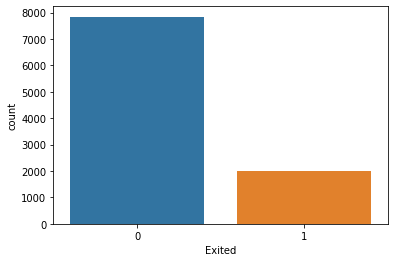

In [59]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(data=data,x ='Exited')
 
# Show the plot
plt.show()

### **Oversampling on target variable**

In [60]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
counter1 = Counter(data['Exited'])
print("Counter before SMOTE: ",counter1)

#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(data[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']],data['Exited'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])
df_oversampler['Exited'] = y

counter2 = Counter(df_oversampler['Exited'])
print("Counter after SMOTE: ",counter2)


Counter before SMOTE:  Counter({0: 7841, 1: 2018})
Counter after SMOTE:  Counter({1: 7841, 0: 7841})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



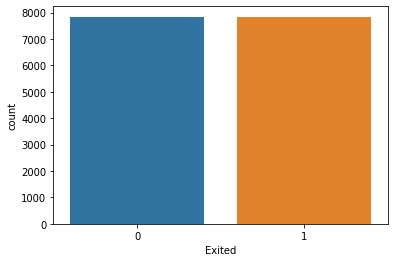

In [61]:
sns.countplot(df_oversampler['Exited'])

In [62]:
df_oversampler.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [84]:
import plotly.graph_objects as go
import plotly.express as px

age_counts =df_oversampler['Age'].value_counts()
age = age_counts

fig = px.bar(age_counts, title="Age of respondents",color_continuous_scale='Bluered_r')
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()


In [73]:
import plotly.graph_objects as go
import plotly.express as px

age_counts =df_oversampler['CreditScore'].value_counts()
age = age_counts

fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()


In [82]:
import plotly.express as px
# df = px.data.tips()
fig = px.box(df_oversampler,  y="EstimatedSalary", color="Exited",
            #  notched=True, # used notched shape
             title="Box plot of total bill",
            #  hover_data=["day"] # add day column to hover data
            )
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [83]:
import plotly.graph_objects as go
import plotly.express as px

age_counts =df_oversampler['EstimatedSalary'].value_counts()
age = age_counts

fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()


In [64]:
# df_oversampler.to_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data.csv", index=False)
# df_oversampler.to_csv("/content/drive/MyDrive/Customer_Churn/cleaned_h.csv",index=False)

In [65]:
# df_oversampler.shape